# Sample cuts

In [1]:
import snpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import glob

%config InlineBackend.figure_format = 'retina'
print(f'SNooPy version: v{snpy.__version__}')

SNOOPY_MODEL = 'max_model'

SNooPy version: v2.6.0


___
## Testing SNooPy

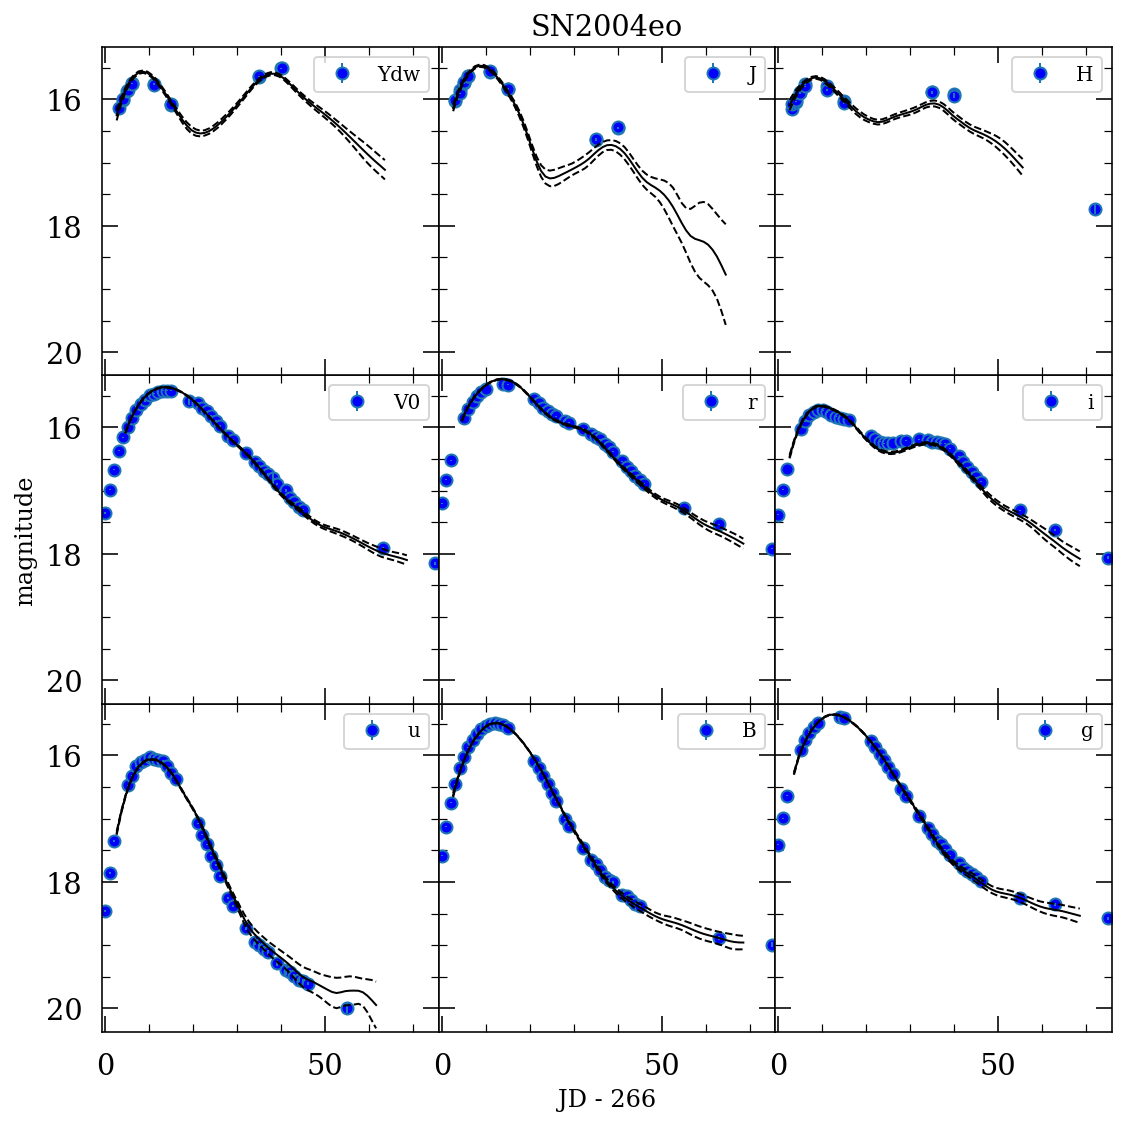

In [36]:
sn_name = 'SN2004eo'
sn_file = os.path.join('csp_dr3', f'{sn_name}_snpy.txt')
sn = snpy.import_lc(sn_file)
                 
sn.choose_model(SNOOPY_MODEL)
sn.fit()

In [40]:
bands = sn.allbands()
bands.delete('u')

AttributeError: 'list' object has no attribute 'delete'

In [41]:
bands.remove('u')

In [47]:
bands = sn.allbands()
bands.remove('u')
bands

['g', 'r', 'i', 'B', 'V0', 'Ydw', 'J', 'H']

In [48]:
sn.allbands()

['u', 'g', 'r', 'i', 'B', 'V0', 'Ydw', 'J', 'H']

In [37]:
sn.summary()

--------------------------------------------------------------------------------
SN  SN2004eo
z = 0.0157          zcmb = 0.0147          ra=308.22579         dec=  9.92853 
Data in the following bands: u,  g,  r,  i,  B,  V0,  Ydw,  J,  H,  
Fit results (if any):
   st = 0.817  +/-  0.005  +/- 0.030 (sys)
   Tmax = 279.071  +/-  0.042  +/- 0.340 (sys)
   umax = 15.565  +/-  0.014  +/- 0.030 (sys)
   gmax = 15.031  +/-  0.008  +/- 0.014 (sys)
   rmax = 15.024  +/-  0.007  +/- 0.022 (sys)
   imax = 15.524  +/-  0.009  +/- 0.022 (sys)
   Bmax = 15.114  +/-  0.007  +/- 0.012 (sys)
   Vmax = 15.059  +/-  0.009  +/- 0.019 (sys)
   Ymax = 15.473  +/-  0.026  +/- 0.050 (sys)
   Jmax = 15.417  +/-  0.029  +/- 0.044 (sys)
   Hmax = 15.623  +/-  0.039  +/- 0.055 (sys)


___
## SNe with J and H bands

Note that there is also **Jrc2** band. We only consider SNe with J/Jrc2 AND H bands.

In [10]:
def extract_bands(sn_file):
    """Reads a SN file with SNooPy format and
    extracts the bands/filters used.
    
    Parameters
    ==========
    sn_file: str
        SN file in SNooPy format.

    Returns
    =======
    bands: list
        List of bands for a given SN.
    """
    
    bands = []
    with open(sn_file, 'r') as file:
        for line in file:
            if 'filter' in line:
                band = line.split()[-1]
                bands.append(band)
                
    return bands

In [41]:
sn_files = [file for file in glob.glob('csp_dr3/*.txt')]

count = 0
with open('sne_wo_JorH.txt', 'w') as fout:
    for sn_file in sn_files:
        file_basename = sn_file.split('/')[-1]
        sn_name = file_basename.split('_')[0]
        
        bands = extract_bands(sn_file)

        if (('J' not in bands) & ('Jrc2' not in bands)) or ('H' not in bands):
            print(f'{sn_name} does not have J or H bands: {bands}')
            bands_str = ''.join(band+'-' for band in bands)[:-1]
            fout.write(f'{sn_name} \t{bands_str}\n')
            count += 1
            
print(f'{count} SNe without J or H bands.')        

SN2009P does not have J or H bands: ['u', 'g', 'r', 'i', 'B', 'V', 'Y', 'Jrc2']
SN2005hj does not have J or H bands: ['u', 'g', 'r', 'i', 'B', 'V0', 'V', 'Y', 'J']
SN2006ef does not have J or H bands: ['u', 'g', 'r', 'i', 'B', 'V']
SN2008bz does not have J or H bands: ['u', 'g', 'r', 'i', 'B', 'V']
SN2009J does not have J or H bands: ['u', 'g', 'r', 'i', 'B', 'V', 'Y']
SN2006lu does not have J or H bands: ['u', 'g', 'r', 'i', 'B', 'V', 'Y', 'Ydw']
SN2008go does not have J or H bands: ['u', 'g', 'r', 'i', 'B', 'V', 'Y']
SN2007mm does not have J or H bands: ['u', 'g', 'r', 'i', 'B', 'V']
SN2007jd does not have J or H bands: ['u', 'g', 'r', 'i', 'B', 'V', 'Y', 'Ydw', 'J']
SN2008cd does not have J or H bands: ['u', 'g', 'r', 'i', 'B', 'V']
SN2004dt does not have J or H bands: ['u', 'g', 'r', 'i', 'B', 'V0']
SN2005W does not have J or H bands: ['u', 'g', 'r', 'i', 'B', 'V0']
SN2007jh does not have J or H bands: ['u', 'g', 'r', 'i', 'B', 'V', 'Y', 'H']
SN2007hx does not have J or H bands: ['

## SNe with coverage around optical peak

First we remove those SNe without J or H bands found above.
To have "good" coverage of the optical peak, we requiere to have at least one data point 2 days before B band maximum in observed B g, or r bands.

Fitting 105 SNe (29 from 134 CSP SNe removed using cuts)
SN2008hu does not have coverage before B max
SN2006ev does not have coverage before B max
SN2008ff does not have coverage before B max
SN2008bt does not have coverage before B max


/home/tomas/anaconda3/lib/python3.6/site-packages/snpy/model.py:310: RuntimeWarning: overflow encountered in power
  f = power(10, -0.4*(mod - self.parent.data[band].filter.zp))
/home/tomas/anaconda3/lib/python3.6/site-packages/snpy/model.py:322: RuntimeWarning: invalid value encountered in multiply
  resids_list.append((f - self.parent.data[band].flux)*W)
/home/tomas/anaconda3/lib/python3.6/site-packages/snpy/model.py:313: RuntimeWarning: overflow encountered in power
  cov_f = power(f*err/1.0857,2)


Unable to fit SN2006mr
SN2007ux does not have coverage before B max
Unable to fit SN2005hk
SN2006br does not have coverage before B max
SN2008cf does not have coverage before B max
SN2007as does not have coverage before B max
SN2008cc does not have coverage before B max
SN2008bq does not have coverage before B max
SN2007bm does not have coverage before B max
SN2007hj does not have coverage before B max
SN2006ot does not have coverage before B max
SN2005am does not have coverage before B max
SN2007nq does not have coverage before B max
SN2007ai does not have coverage before B max
Unable to fit SN2007N
SN2008C does not have coverage before B max
Unable to fit SN2005gj
Unable to fit SN2010ae
SN2008gg does not have coverage before B max
SN2006eq does not have coverage before B max
SN2008fl does not have coverage before B max
SN2008O does not have coverage before B max
Unable to fit SN2007ax
Unable to fit SN2008ae
SN2006ej does not have coverage before B max
Unable to fit SN2008bi
SN2005al 

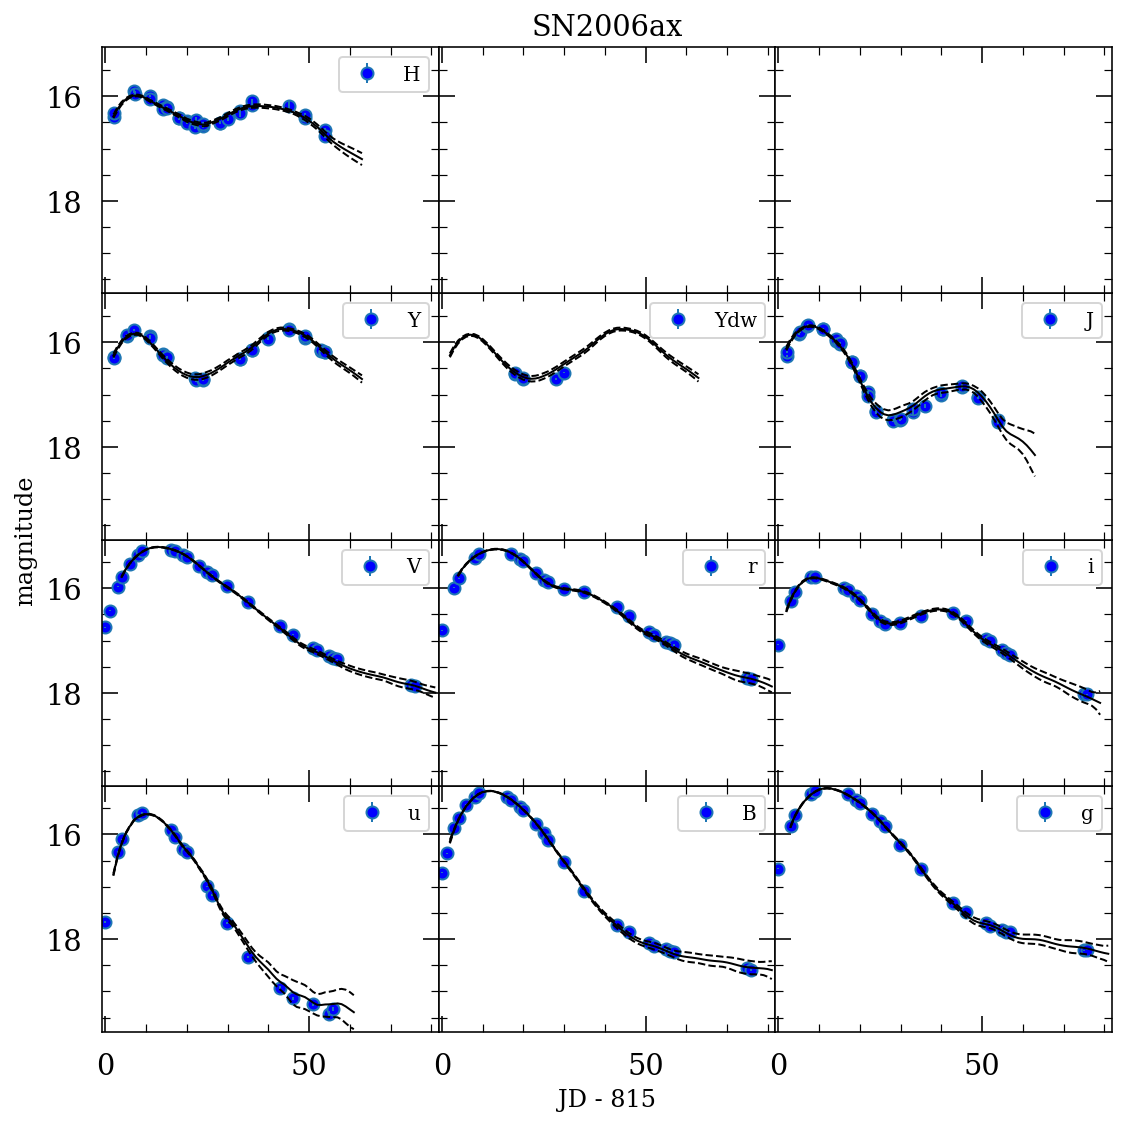

In [37]:
# SNe to remove
df = pd.read_csv('sne_wo_JorH.txt', names=['name', 'bands'], delim_whitespace=True)
files2remove = [f'csp_dr3/{name}_snpy.txt' for name in df.name.values]

sn_files = [file for file in glob.glob('csp_dr3/*.txt') if file not in files2remove]
print(f'Fitting {len(sn_files)} SNe ({len(files2remove)} from 134 CSP SNe removed using cuts)')

count = 0
failed_count = 0
with open('sne_wo_opt_max.txt', 'w') as fout:
    for sn_file in sn_files:
        sn = snpy.import_lc(sn_file)
        
        # remove bands with no photometry (no idea why they are empty)
        for band in sn.allbands():
            band_mag = sn.data[band].magnitude
            if len(band_mag)==0:
                sn.data.pop(band)

        try:
            sn.choose_model(SNOOPY_MODEL)
            sn.fit()
        except Exception as message:
            print(f'Unable to fit {sn.name}: {message}')
            fout.write(f'{sn.name} \tfit-failed\n')
            failed_count += 1
            continue  # skip this SN

        # check if there is optical coverage before B max
        opt_peak_covered = False
        for band in sn.allbands():
            if band in ['B', 'g', 'r']:
                times = sn.data[band].get_t()  # observed epochs
                # we require data at least 2 days before optical peak
                if np.any(times<=-2):
                    opt_peak_covered = True
                    break

        # save the plots of the SNe w/o optical peak coverage
        if not opt_peak_covered:
            print(f'{sn.name} does not have coverage before B max')
            fout.write(f'{sn.name} \tno-peak-coverage\n')

            #sn.save(f'opt_cuts_fits/{sn.name}.snpy')
            sn.plot(outfile=f'opt_cuts_fits/{sn.name}.jpeg')
            count += 1
            
print(f'{count} SNe without optical peak coverage and {failed_count} with failed fits.')

There are two main errors when the fits fail:
        
1) `RuntimeError: Error:  Covariance Matrix is singular. Either two or more parameters are degenerate or the model has become insensitive to one or more parameters.`

2) `RuntimeError: All weights for filter H are zero. The fitter is in a part of parameter space where the model is not valid or there is no useful data.` (for different filters)

## SNe w/o NIR peak coverage

We need to remove those SNe without J or H bands + those without optical peak coverage first.

Fitting 55 SNe (79 from 134 CSP SNe removed using cuts)
Unable to fit SN2006D
SN2005iq does not have coverage before NIR max
SN2005na does not have coverage before NIR max
SN2008gl does not have coverage before NIR max
SN2006ob does not have coverage before NIR max
SN2006gj does not have coverage before NIR max
SN2009cz does not have coverage before NIR max
SN2007jg does not have coverage before NIR max
SN2004ef does not have coverage before NIR max
SN2004gs does not have coverage before NIR max
SN2006bt does not have coverage before NIR max
SN2009D does not have coverage before NIR max
Unable to fit SN2005A
SN2008ia does not have coverage before NIR max
SN2004gu does not have coverage before NIR max
13 SNe without NIR peak coverage and 2 with failed fits.


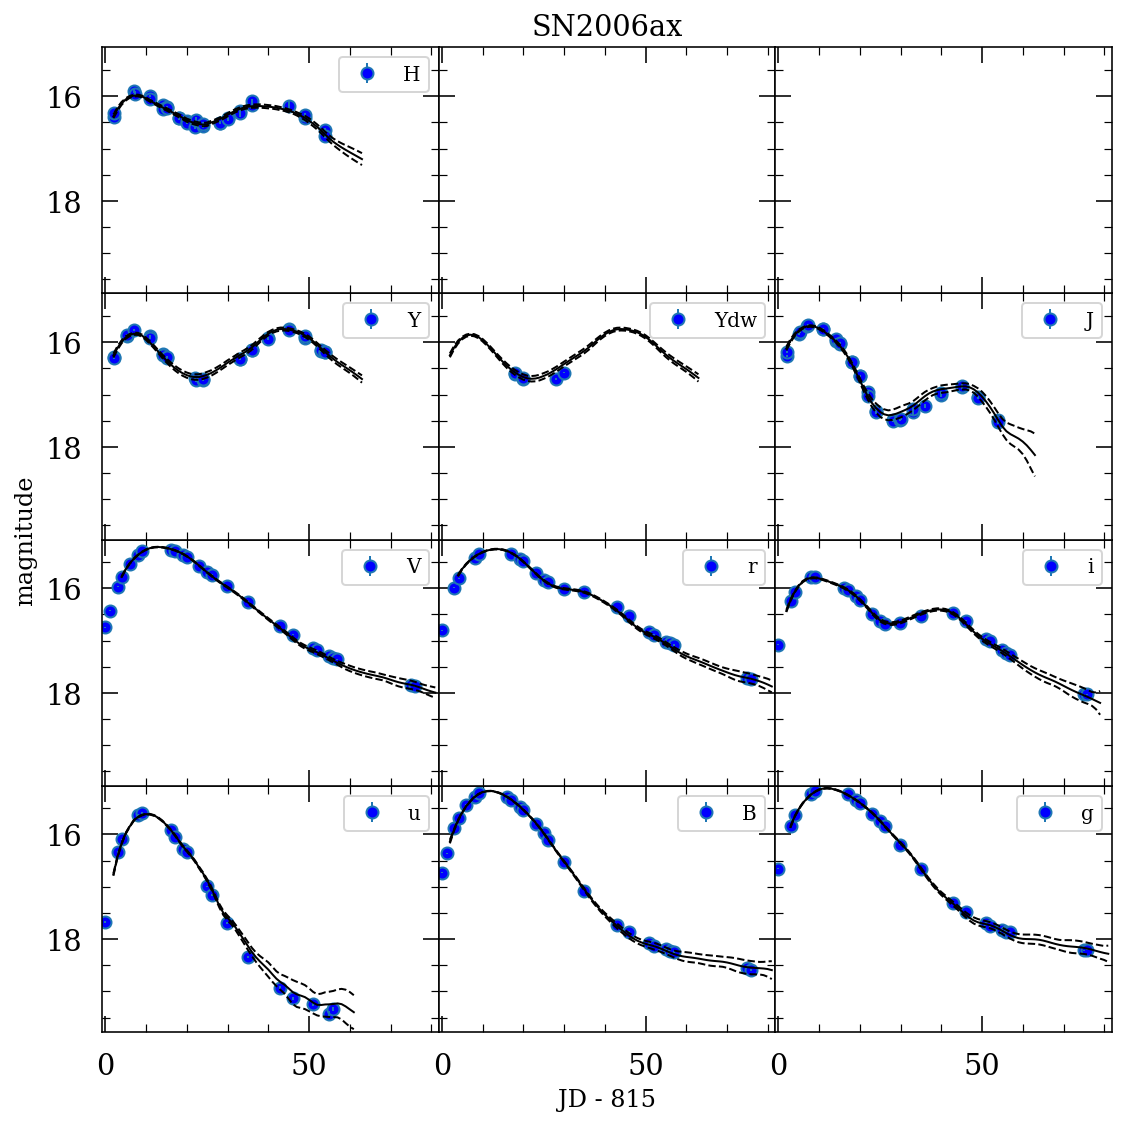

In [40]:
# SNe to remove
df1 = pd.read_csv('sne_wo_JorH.txt', names=['name', 'bands'], delim_whitespace=True)
df2 = pd.read_csv('sne_wo_opt_max.txt', names=['name', 'comment'], delim_whitespace=True)
del_df = pd.concat([df1, df2])
files2remove = [f'csp_dr3/{name}_snpy.txt' for name in list(del_df.name.values)]

sn_files = [file for file in glob.glob('csp_dr3/*.txt') if file not in files2remove]
print(f'Fitting {len(sn_files)} SNe ({len(files2remove)} from 134 CSP SNe removed using cuts)')

count = 0
failed_count = 0
with open('sne_wo_nir_max.txt', 'w') as fout:
    for sn_file in sn_files:
        sn = snpy.import_lc(sn_file)

        try:
            sn.choose_model(SNOOPY_MODEL)
            sn.fit()
        except Exception as message:
            print(f'Unable to fit {sn.name}: {message}')
            fout.write(f'{sn.name} \tfit-failed\n')
            failed_count += 1
            continue  # skip this SN

        # check if there is NIR coverage before NIR max
        nir_peak_covered = False
        for band in sn.allbands():
            if band in ['J', 'Jrc2', 'H']:
                
                model_times = np.arange(sn.Tmax-20, sn.Tmax+40)
                model_mag, _, mask = sn.model(band, model_times)
                model_phases  = model_times[mask]-sn.Tmax 
                model_mag = model_mag[mask]
                
                phases = sn.data[band].get_t()  # observed phases wrt Tmax
                first_epoch = phases[0]  # phase of first epoch
                
                peak_model_id = np.argmin(model_mag)
                peak_model_phase = model_phases[peak_model_id]

                if first_epoch<peak_model_phase:
                    nir_peak_covered = True
                    break

        # save the plots of the SNe w/o optical peak coverage
        if not nir_peak_covered:
            print(f'{sn.name} does not have coverage before NIR max')
            fout.write(f'{sn.name} \tno-peak-coverage\n')

            #sn.save(f'nir_cuts_fits/{sn.name}.snpy')
            sn.plot(outfile=f'nir_cuts_fits/{sn.name}.jpeg')
            count += 1

print(f'{count} SNe without NIR peak coverage and {failed_count} with failed fits.')

### save reference files

In [ ]:
# SNe to remove
df1 = pd.read_csv('sne_wo_JorH.txt', names=['name', 'bands'], delim_whitespace=True)
df2 = pd.read_csv('sne_wo_opt_max.txt', names=['name', 'comment'], delim_whitespace=True)
df3 = pd.read_csv('sne_wo_nir_max.txt', names=['name', 'comment'], delim_whitespace=True)
del_df = pd.concat([df1, df2, df3])
files2remove = [f'csp_dr3/{name}_snpy.txt' for name in list(del_df.name.values)]

sn_files = [file for file in glob.glob('csp_dr3/*.txt') if file not in files2remove]
print(f'Fitting {len(sn_files)} SNe ({len(files2remove)} from 134 CSP SNe removed using cuts)')

# save reference files into an output file
with open('reference_files.txt', 'w') as outfile:
    for sn_file in sn_files:
        outfile.write(sn_file + '\n')